<a href="https://colab.research.google.com/github/Tarun9640/py/blob/master/dlass4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Peela Tarun Kumar
20MAI0029

In [ ]:
Q1)Demonstrate the activation function using python code 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

val = [-5,-4,-3,-2,-1,0,1,2,3,4,5]

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


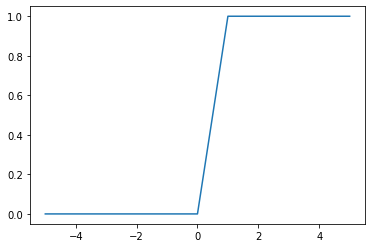

In [ ]:
#Binary Step Activation Function
def binaryactivation(x):
  y = []

  for i in range(len(x)):
    if x[i] > 0:
      y.append(1)
    else:
      y.append(0)
    
  print(y)
  plt.plot(x,y)
  
binaryactivation(val)

[0.0066928509242848554, 0.01798620996209156, 0.04742587317756678, 0.11920292202211755, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8807970779778823, 0.9525741268224334, 0.9820137900379085, 0.9933071490757153]


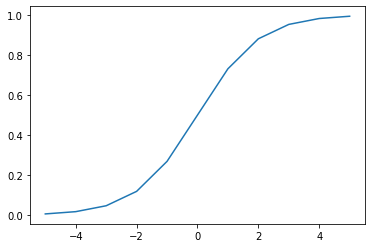

In [ ]:
#Sigmoid Activation Function
def sigmoidactivation(x):
  y = []
  for i in range(len(x)):
    y.append(1/(1+np.exp(-x[i])))
  print(y)
  plt.plot(x,y)

sigmoidactivation(val)

[4.5397868702390376e-05, 0.000335350130466483, 0.002472623156634768, 0.01798620996209155, 0.11920292202211757, 0.5, 0.8807970779778824, 0.9820137900379085, 0.9975273768433652, 0.9996646498695335, 0.9999546021312976]


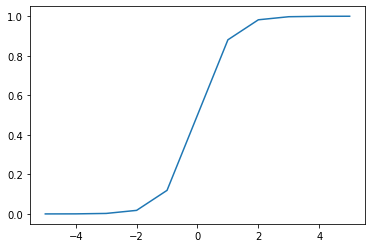

In [ ]:
#Tanh Activation Function
def tanhactivation(x):
  y=[]
  for i in range(len(x)):
    y.append((1-np.exp(-2*x[i])/(1+np.exp(-2*x[i]))))

  print(y)
  plt.plot(x,y)

tanhactivation(val)

[0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5]


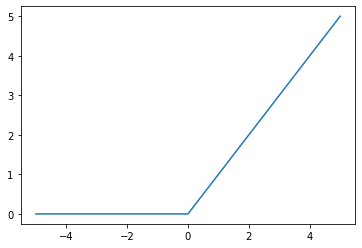

In [ ]:
#RELU Activation Function
def reluactivation(x):
   y = []
   for i in range(len(x)):
     y.append(max(0,x[i]))
   print(y)
   plt.plot(x,y)
  
reluactivation(val)

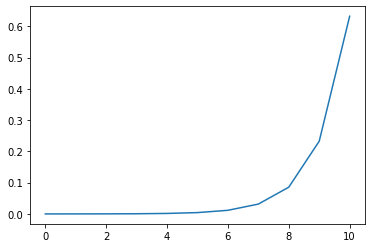

In [ ]:
#Softmax Activation Function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
plt.plot(softmax(val))
plt.show()

In [ ]:
Q2)Write a python code to filter the given image using following size of the 
filters (receptive field) 
1)filter size (3*3) and (5*5)
2)filter size (3*3) and (5*5), stride=2 
3)filter size (3*3) and (5*5), stride=1, zero-padding
4)Entropy

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

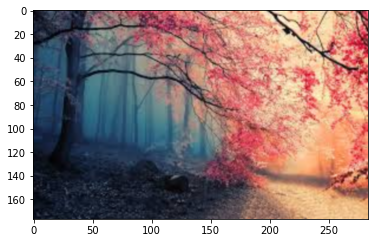

In [ ]:
img = cv.imread('img1.jpg',1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, interpolation = 'bicubic')
plt.show()

In [ ]:
# (3,3) box filter and (5,5) guassian filter is applied
k = np.array(( [1, 1, 1], [1, 1, 1], [1, 1, 1]),np.float32)
l = np.array((([1/256, 4/256, 6/256, 4/256, 1/256], [4/256, 16/256, 24/256, 16/256, 4/256], [6/256, 24/256, 36/256, 24/256, 6/256], [4/256, 16/256, 24/256, 16/256, 4/256],[1/256, 4/256, 6/256, 4/256, 1/256])))
print("Box filter","\n",k,"\n")
print("Gaussian filter","\n",l)

Box filter 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

Gaussian filter 
 [[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


In [ ]:
output1 = cv2.filter2D(img,-1,k)
output2 = cv2.filter2D(img,-1,l)

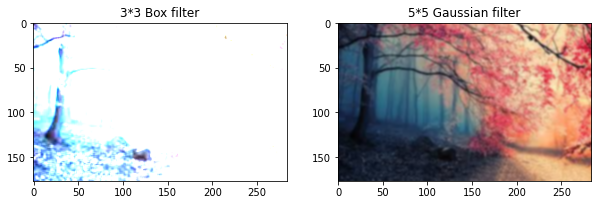

In [ ]:
plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.title("3*3 Box filter")
plt.imshow(output1)

plt.subplot(1,2,2)
plt.title("5*5 Gaussian filter")
plt.imshow(output2)

In [ ]:
import skimage.measure
shan_entropy_original = skimage.measure.shannon_entropy(img)
shan_entropy_box = skimage.measure.shannon_entropy(output1)
shan_entropy_gauss = skimage.measure.shannon_entropy(output2)

In [ ]:
print("Entropy of original image:" ,shan_entropy_original,"\n")
print("Entropy of box filter image:" ,shan_entropy_box,"\n")
print("Entropy of gaussian filter image:" ,shan_entropy_gauss,"\n")

Entropy of original image: 7.8549800191298615 

Entropy of box filter image: 7.1396508382614465 

Entropy of gaussian filter image: 7.8234840335207005 



In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from numpy import asarray

In [ ]:
model=Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,2),input_shape=(8, 8, 1)))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 3, 3, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
def comp_conv2d(conv2d, X):
    # Here (1, 1) indicates that the batch size and the number of channels
    # are both 1
    X = tf.reshape(X, (1, ) + X.shape + (1, ))
    Y = conv2d(X)
    # Exclude the first two dimensions that do not interest us: examples and
    # channels
    return tf.reshape(Y, Y.shape[1:3])
# Note that here 1 row or column is padded on either side, so a total of 2
# rows or columns are added
conv2d = tf.keras.layers.Conv2D(1, kernel_size=3, padding='same')
X = tf.random.uniform(shape=(0, 250))
comp_conv2d(conv2d, X).shape

TensorShape([0, 250])